本文主要以kaggle一次二分类竞赛数据为例，深入研究改进forest

LayerDTree是LayerForest的精简版，是对Forest进一步探索的基础

- 数据地址：https://www.kaggle.com/c/porto-seguro-safe-driver-prediction
- 数据特点：
  - 非常不均衡、缺失值严重、二分类
- 包含内容：
  1. 数据获取
  2. 模型应用
  3. 结果分析

# Stage-1：获取数据

In [1]:
import os
import numpy as np
import pandas as pd
import time
import os.path as osp

In [2]:
import DataHelper
import importlib
importlib.reload(DataHelper)

<module 'DataHelper' from 'C:\\github_workspace\\ecoForest\\DataHelper.py'>

In [3]:
X_train,y_train, X_sub, y_sub = DataHelper.get_driver_data()

X.shape: (32561, 14) y.shape: (32561,)
X.shape: (16281, 14) y.shape: (16281,)


In [223]:
X_train,y_train, X_sub, y_sub = DataHelper.get_letter_data()

X.shape: (16000, 16) y.shape: (16000,)
X.shape: (4000, 16) y.shape: (4000,)


In [21]:
X_train,y_train, X_sub, y_sub = DataHelper.get_yeast_data()

X.shape: (1038, 8) y.shape: (1038,)
X.shape: (446, 8) y.shape: (446,)


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
y_sub[:50]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 3, 3, 0, 1, 2, 1, 0, 8, 0, 0, 2, 0,
       5, 3, 6, 1, 2, 0, 8, 0, 1, 1, 2, 1, 1, 5, 0, 3, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1])

In [23]:
from collections import Counter

In [24]:
Counter(y_train)

Counter({0: 324,
         1: 300,
         2: 171,
         3: 114,
         4: 36,
         5: 31,
         6: 24,
         7: 21,
         8: 14,
         9: 3})

In [25]:
Counter(y_sub)

Counter({0: 139, 1: 129, 2: 73, 3: 49, 4: 15, 5: 13, 6: 11, 7: 9, 8: 6, 9: 2})

# Stage-2：模型应用

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import ForestUtils
import time
import random
from sklearn import metrics

In [10]:
import EnhancedDTree
import EnhancedForest
import importlib

In [11]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [17]:
# def acc_prob(y_sub, p_train):
#     threshold = [x*0.01 for x in range(30,71,1)]
#     result = []
#     for i in range(len(threshold)):
#         test_y_acc_index = np.where(p_train > threshold[i])[0]
#         test_y_acc = np.array([0] * len(p_train))
#         test_y_acc[test_y_acc_index] = 1
#         tmp = metrics.accuracy_score(y_sub, test_y_acc)
#         result.append(tmp)
#     result = np.array(result)
#     return np.max(result)

# 决策树算法

In [12]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
clf = clf.fit(X_train, y_train)

In [14]:
# p_train = clf.predict_proba(X_sub)
# p_train = [item[1] for item in p_train]
# p_train = np.array(p_train)
# print("data auc", metrics.roc_auc_score(y_sub, p_train))
# print("data log", metrics.log_loss(y_sub, p_train)) 
# print("data acc", acc_prob(y_sub, p_train))

In [15]:
p_train = clf.predict(X_sub)
print("data auc", metrics.accuracy_score(y_sub, p_train))

data auc 0.504484304933


# 随机森林算法

In [16]:
# rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=4, random_state=1024, verbose=True, min_samples_leaf=10)
# rf

In [33]:
rf = RandomForestClassifier(n_estimators=200, random_state=1023)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1023, verbose=0,
            warm_start=False)

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1023, verbose=0,
            warm_start=False)

In [35]:
# p_train = rf.predict_proba(X_sub)
# p_train = [item[1] for item in p_train]
# p_train = np.array(p_train)
# print("data auc", metrics.roc_auc_score(y_sub, p_train))
# print("data log", metrics.log_loss(y_sub, p_train))
# print("data acc", acc_prob(y_sub, p_train))

In [36]:
p_train = rf.predict(X_sub)
print("data acc", metrics.accuracy_score(y_sub, p_train))
# print("data log", metrics.log_loss(y_sub, p_train)) 

data acc 0.632286995516


In [27]:
p_train = rf.predict(X_train)
print("data acc", metrics.accuracy_score(y_train, p_train))
# print("data log", metrics.log_loss(y_sub, p_train)) 

data acc 1.0


# XGB算法

In [28]:
import xgboost as xgb

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
params = {
#     'objective': 'binary:logistic',
    'objective':'multi:softmax',
#     'objective':'multi:softprob',
    'num_class':10
#     'silent': True,
    
#     'max_depth': 4,
#     'eta': 0.020,
#     'gamma': 0.65,
    
#     'colsample_bytree': 0.8,
#     'subsample': 0.6,
    
#     'num_boost_round' : 700,
#     'min_child_weight': 10.0,
#     'max_delta_step': 1.8,
}

In [31]:
# Define the gini metric - from https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703#5897
def ginic(actual, pred):
    actual = np.asarray(actual) #In case, someone passes Series or list
    n = len(actual)
    a_s = actual[np.argsort(pred)]
    a_c = a_s.cumsum()
    giniSum = a_c.sum() / a_s.sum() - (n + 1) / 2.0
    return giniSum / n

def gini_normalized(a, p):
#     if p.ndim == 2:#Required for sklearn wrapper
#         p = p[:,1] #If proba array contains proba for both 0 and 1 classes, just pick class 1
    return ginic(a, p) / ginic(a, a)

# Create an XGBoost-compatible metric from Gini
def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

def acc_xgb(preds, dtrain):
    labels = dtrain.get_label()
    acc_score = metrics.accuracy_score(labels, preds)
    return 'acc', acc_score

In [32]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=9487)
split_obj = tuple(sss.split(X_train, y_train))
train_index, test_index = split_obj[0]
X_1, X_2 = X_train[train_index], X_train[test_index]
y_1, y_2 = y_train[train_index], y_train[test_index]

In [33]:
d_train = xgb.DMatrix(X_1, y_1)
d_valid = xgb.DMatrix(X_2, y_2)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

mdl = xgb.train(params, d_train, 
                    num_boost_round=1600, evals=watchlist, early_stopping_rounds=500,
                    feval=acc_xgb,  maximize=True, 
                verbose_eval=100)

[0]	train-acc:0.660998	valid-acc:0.551282
Multiple eval metrics have been passed: 'valid-acc' will be used for early stopping.

Will train until valid-acc hasn't improved in 500 rounds.
[100]	train-acc:1	valid-acc:0.525641
[200]	train-acc:1	valid-acc:0.49359
[300]	train-acc:1	valid-acc:0.474359
[400]	train-acc:1	valid-acc:0.487179
[500]	train-acc:1	valid-acc:0.49359
Stopping. Best iteration:
[17]	train-acc:0.901361	valid-acc:0.583333



In [34]:
# d_test = xgb.DMatrix(X_sub)
# p_train = mdl.predict(d_test)
# print("data auc", metrics.roc_auc_score(y_sub, p_train))
# print("data log", metrics.log_loss(y_sub, p_train))
# print("data acc", acc_prob(y_sub, p_train))

In [37]:
d_test = xgb.DMatrix(X_sub)
p_train = mdl.predict(d_test)
# print("data auc", metrics.roc_auc_score(y_sub, p_train))
# print("data log", metrics.log_loss(y_sub, p_train))
# print("data acc", acc_prob(y_sub, p_train))
print("data acc", metrics.accuracy_score(y_sub, p_train))

data acc 0.582959641256


In [50]:
p_train

array([ 20.,  13.,  21., ...,  19.,  18.,   0.], dtype=float32)

In [285]:
test_y_acc_index = np.where(p_train > 0.5)[0]
test_y_acc = np.array([0] * len(p_train))
test_y_acc[test_y_acc_index] = 1
metrics.accuracy_score(y_sub, test_y_acc)

0.86757570173822252

# GDBT算法

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gdbt = GradientBoostingClassifier(n_estimators=100)
gdbt

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [40]:
gdbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [41]:
# p_train = gdbt.predict_proba(X_sub)
# p_train = [item[1] for item in p_train]
# p_train = np.array(p_train)
# print("data auc", metrics.roc_auc_score(y_sub, p_train))
# print("data log", metrics.log_loss(y_sub, p_train))
# print("data acc", acc_prob(y_sub, p_train))

In [42]:
p_train = gdbt.predict(X_sub)
print("data acc", metrics.accuracy_score(y_sub, p_train))
# print("data log", metrics.log_loss(y_sub, p_train)) 

data acc 0.609865470852


In [44]:
p_train = gdbt.predict(X_train)
print("data acc", metrics.accuracy_score(y_train, p_train))
# print("data log", metrics.log_loss(y_sub, p_train)) 

data acc 0.876685934489


# BaseLine

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.linear_model import LogisticRegression

In [38]:
def acc_metrix_mult(a, p):
#     print(p)
    return "acc:", metrics.accuracy_score(a, p)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
kfold = 5
X = X_train.copy()
y = y_train.copy()
X_test = X_sub.copy()
real_y = y_sub.copy()
max_depth = None
random_state = 1023
min_samples_leaf = 1
criterion = 'entropy'#'gini'
# criterion = 'gini'#'gini'
num_class = 10
feval = acc_metrix_mult
n_estimators = 200

In [82]:
sss = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=9487)

p_all_fold = np.zeros(X.shape[0])
p_all_fold_prob = np.zeros((X.shape[0], num_class))
p_all_fold_prob_test = np.zeros((X_test.shape[0], num_class))
clf_folds = []
for i, (train_index, test_index) in enumerate(sss.split(X, y)):
    X_train_bl, X_valid_bl = X[train_index], X[test_index]
    y_train_bl, y_valid_bl = y[train_index], y[test_index]
        
    print("X_train.shape, y_train.shape:"+str(X_train_bl.shape)+str(y_train_bl.shape))
    print("X_valid.shape, y_valid.shape:"+str(X_valid_bl.shape)+str(y_valid_bl.shape))
        
    clf = RandomForestClassifier(max_depth=max_depth, random_state=random_state, 
                                    min_samples_leaf=min_samples_leaf, n_estimators=n_estimators, n_jobs=-1,
                                         #max_leaf_nodes=100,
    #                                  n_estimators=2, n_jobs=8, oob_score=True, verbose=1, boostrap=False,
                                     criterion=criterion)
    clf = clf.fit(X_train_bl, y_train_bl)
    clf_folds.append(clf)
    print(clf)
    
#     cross_score = cross_val_score(clf, X_valid, y_valid, cv=3)
#     print("    cross_score: %.5f" % (cross_score.mean()))
    print("    test score", feval(real_y, clf.predict(X_test)))
    
    
    if not num_class:
        y_pred = clf.predict_proba(X_valid_bl)[:,1]
    else:
        y_pred = clf.predict(X_valid_bl)
        y_pred_prob = clf.predict_proba(X_valid_bl)
        y_pred_prob_test = clf.predict_proba(X_test)

    p_all_fold[test_index] += y_pred
    p_all_fold_prob[test_index] += y_pred_prob
    p_all_fold_prob_test[:, :] += y_pred_prob_test/kfold
print("train kflod pred:", feval(y, p_all_fold))

### lr pred
log_model = LogisticRegression()
log_model.fit(p_all_fold_prob, y)
res = log_model.predict(p_all_fold_prob)
print("lr train", feval(y, res))
res = log_model.predict(p_all_fold_prob_test)
print("lr test", feval(real_y, res))
print("lr coef_", np.mean(log_model.coef_))

#### test pred
y_preds = np.zeros((X_test.shape[0], len(clf_folds)))
for i, clf in enumerate(clf_folds):
    if not num_class:
        y_pred = clf.predict_proba(X_test)[:,1]
    else:
        y_pred = clf.predict(X_test)
    y_preds[:, i] = y_pred

if not num_class:
    result = y_preds.mean(axis=1)
else:
#     print(y_preds)
    m = stats.mode(y_preds, axis=1)
    result = np.array([i[0] for i in m[0]])
# print(result)
print("test pred", feval(real_y, result))

#### train pred
y_preds = np.zeros((X.shape[0], len(clf_folds)))
for i, clf in enumerate(clf_folds):
    if not num_class:
        y_pred = clf.predict_proba(X)[:,1]
    else:
        y_pred = clf.predict(X)
    y_preds[:, i] = y_pred

if not num_class:
    result = y_preds.mean(axis=1)
else:
#     print(y_preds)
    m = stats.mode(y_preds, axis=1)
    result = np.array([i[0] for i in m[0]])
print("train pred", feval(y, result))

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


X_train.shape, y_train.shape:(827, 8)(827,)
X_valid.shape, y_valid.shape:(211, 8)(211,)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=1023, verbose=0,
            warm_start=False)
    test score ('acc:', 0.62331838565022424)
X_train.shape, y_train.shape:(831, 8)(831,)
X_valid.shape, y_valid.shape:(207, 8)(207,)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_

In [50]:
sss = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=9487)

p_all_fold = np.zeros(X.shape[0])
clf_folds = []
for i, (train_index, test_index) in enumerate(sss.split(X, y)):
    X_train_bl, X_valid_bl = X[train_index], X[test_index]
    y_train_bl, y_valid_bl = y[train_index], y[test_index]
        
    print("X_train.shape, y_train.shape:"+str(X_train_bl.shape)+str(y_train_bl.shape))
    print("X_valid.shape, y_valid.shape:"+str(X_valid_bl.shape)+str(y_valid_bl.shape))
        
    clf = RandomForestClassifier(max_depth=max_depth, random_state=random_state, 
                                    min_samples_leaf=min_samples_leaf, n_estimators=n_estimators, n_jobs=-1,
                                         #max_leaf_nodes=100,
    #                                  n_estimators=2, n_jobs=8, oob_score=True, verbose=1, boostrap=False,
                                     criterion=criterion)
    clf = clf.fit(X_train_bl, y_train_bl)
    clf_folds.append(clf)
    print(clf)
    
#     cross_score = cross_val_score(clf, X_valid, y_valid, cv=3)
#     print("    cross_score: %.5f" % (cross_score.mean()))
    print("    test score", feval(real_y, clf.predict(X_test)))
    
    
    if not num_class:
        y_pred = clf.predict_proba(X_valid_bl)[:,1]
    else:
        y_pred = clf.predict(X_valid_bl)

    p_all_fold[test_index] += y_pred
print("train kflod pred:", feval(y, p_all_fold))

#### test pred
y_preds = np.zeros((X_test.shape[0], len(clf_folds)))
for i, clf in enumerate(clf_folds):
    if not num_class:
        y_pred = clf.predict_proba(X_test)[:,1]
    else:
        y_pred = clf.predict(X_test)
    y_preds[:, i] = y_pred

if not num_class:
    result = y_preds.mean(axis=1)
else:
#     print(y_preds)
    m = stats.mode(y_preds, axis=1)
    result = np.array([i[0] for i in m[0]])
# print(result)
print("test pred", feval(real_y, result))

#### train pred
y_preds = np.zeros((X.shape[0], len(clf_folds)))
for i, clf in enumerate(clf_folds):
    if not num_class:
        y_pred = clf.predict_proba(X)[:,1]
    else:
        y_pred = clf.predict(X)
    y_preds[:, i] = y_pred

if not num_class:
    result = y_preds.mean(axis=1)
else:
#     print(y_preds)
    m = stats.mode(y_preds, axis=1)
    result = np.array([i[0] for i in m[0]])
print("train pred", feval(y, result))

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


X_train.shape, y_train.shape:(827, 8)(827,)
X_valid.shape, y_valid.shape:(211, 8)(211,)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=1023, verbose=0,
            warm_start=False)
    test score ('acc:', 0.62331838565022424)
X_train.shape, y_train.shape:(831, 8)(831,)
X_valid.shape, y_valid.shape:(207, 8)(207,)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_

# layerDTree算法

In [83]:
def acc_metrix(a, p):
    return "acc:", acc_prob(a, p)
def mse_metrix(a, p):
    return "mse:", metrics.mean_squared_error(a,p,labels=labels)
def log_loss_metrix(a, p, labels=[0,1]):
    return "log:", metrics.log_loss(a,p,labels=labels)
def acc_metrix_mult(a, p):
#     print(p)
    return "acc:", metrics.accuracy_score(a, p)

In [63]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [51]:
import EnhancedForest_multiclass

In [69]:
importlib.reload(EnhancedForest_multiclass)

<module 'EnhancedForest_multiclass' from 'C:\\github_workspace\\ecoForest\\EnhancedForest_multiclass.py'>

In [79]:
# 统计信息
train_loss_lt = []
pass_train_loss_lt = []
pass_train_loss_lt_now = []
vaild_loss_lt = []
pass_vaild_loss_lt = []
pass_vaild_loss_lt_now = []
test_loss_lt = []
pass_test_loss_lt = []
pass_test_loss_lt_now = []
pass_data_rate_lt = []

# 数据
X = X_train.copy()
y = y_train.copy()

X_test = X_sub.copy()
test_y = np.array(([0.0] * len(X_test)))
all_data_mask = np.array([False] * len(X_test))
data_mask = np.array([False] * len(X_test))
real_y = y_sub.copy()

# 不均衡数据进行layer
X_train_np = X
y_train_np = y
maxlayer = 100
layer = 0

# 不降低不更新
last_train_loss = 0
last_vaild_loss = 0

enhancedDTree = EnhancedForest_multiclass.EnhancedForest(len(X_train), len(X_test), isLRStacker=True)
counter = 0
early_stop = 0
last_is_early_stop = False
early_stop_up = 0

while 1:
    layer += 1
    print()
    print("layer:", layer, "early_stop:", early_stop, "last_is_early_stop:", last_is_early_stop, "early_stop_up:", early_stop_up)
    X = X_train_np
    y = y_train_np
    if layer == 1: isFirst = True
    else: isFirst = False
        
    feval=acc_metrix_mult
    clf, data_mask, all_false_data_index, p_test = \
        enhancedDTree.TrainModelLayer(X, y, X_test, all_data_mask, test_y, real_y, verbose=False, \
                                      feval=feval, dropout=None, criterion='entropy', random_state=layer, \
                                        max_depth = None, min_samples_leaf = 1,\
                                      isFirst=isFirst, num_class=10, kfold=20\
                                     )
    train_loss = enhancedDTree.getTrainLoss(feval)
    pass_train_loss = enhancedDTree.getPassTrainLoss(feval)
    pass_train_loss_now = enhancedDTree.getPassTrainLossNow(feval)
    vaild_loss = enhancedDTree.getVaildLoss(feval)
    pass_vaild_loss = enhancedDTree.getPassVaildLoss(feval)
    pass_vaild_loss_now = enhancedDTree.getPassVaildLossNow(feval)
    test_loss = enhancedDTree.getTestLoss(feval)
    pass_test_loss = enhancedDTree.getPassTestLoss(feval)
    pass_test_loss_now = enhancedDTree.getPassTestLossNow(feval)
    
    if train_loss[1] < last_train_loss and vaild_loss[1] < last_vaild_loss: 
#     if vaild_loss[1] < last_vaild_loss: 
        if not isFirst: enhancedDTree.remove_last_items()
#         early_stop_up += 1
        if layer > maxlayer or early_stop > 5 or early_stop_up > 15:
            break
        continue
        
    last_train_loss = train_loss[1]
    last_vaild_loss = vaild_loss[1]
    
    X_train_np = enhancedDTree.X_train_np
    y_train_np = enhancedDTree.y_train_np
    
    # 打印信息
    pass_data_id = data_mask[data_mask==True]
#     all_false_data_index = np.where(all_data_mask == False)[0]
    X_test_np = X_test[all_false_data_index]
    print("%d [p:%d/np:%d] " % (layer, len(pass_data_id), len(X_test_np) - len(pass_data_id)))#, end="")
    if len(pass_data_id) == 0: 
        if not last_is_early_stop: early_stop = 0
        early_stop += 1
        last_is_early_stop = True
    else:
        last_is_early_stop = False
        
    print("train loss", train_loss)
    print("pass train loss", pass_train_loss)
    print("pass train loss now", pass_train_loss_now)
    print("vaild loss", vaild_loss)
    print("pass vaild loss", pass_vaild_loss)
    print("pass vaild loss now", pass_vaild_loss_now)
    print("test loss", test_loss)
    print("pass test loss", pass_test_loss)
    print("pass test loss now", pass_test_loss_now)
    
#     tmp_all_data_mask = all_false_data_index[~data_mask]
#     test_y[tmp_all_data_mask] = p_test[~data_mask]
    tmp_test_loss = feval(y_sub, test_y)
    best_test_y = test_y.copy()
    print("best test loss:", tmp_test_loss)
    
    train_loss_lt.append(train_loss[1])
    pass_train_loss_lt.append(pass_train_loss[1])
    pass_train_loss_lt_now.append(pass_train_loss_now[1])
    vaild_loss_lt.append(vaild_loss[1])
    pass_vaild_loss_lt.append(pass_vaild_loss[1])
    pass_vaild_loss_lt_now.append(pass_vaild_loss_now[1])
    test_loss_lt.append(test_loss[1])
    pass_test_loss_lt.append(pass_test_loss[1])
    pass_test_loss_lt_now.append(pass_test_loss_now[1])
    if len(pass_data_rate_lt) == 0:
        pass_data_rate_lt.append(len(data_mask[data_mask==True])/len(X_test))
    else:
        pass_data_rate_lt.append(pass_data_rate_lt[-1]+len(data_mask[data_mask==True])/len(X_test))
    # 打印信息结束
    
#     if X_train_np.shape[0] < 10 or layer > maxlayer or y_train_np[y_train_np==1].shape[0] <= 10 or early_stop > 5:
    if layer > maxlayer or early_stop > 20:
        break
        
    all_data_mask[~all_data_mask] = data_mask


layer: 1 early_stop: 0 last_is_early_stop: False early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


1 [p:0/np:0] 
train loss ('acc:', 0.97013487475915217)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('acc:', 0.60500963391136797)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('acc:', 0.62780269058295968)
pass test loss (0, 0)
pass test loss now (0, 0)
best test loss: ('acc:', 0.62780269058295968)

layer: 2 early_stop: 1 last_is_early_stop: True early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[p:0/1:0|n:1038/1:300] 2 [p:0/np:446] 
train loss ('acc:', 0.97013487475915217)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('acc:', 0.60308285163776498)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('acc:', 0.62107623318385652)
pass test loss (0, 0)
pass test loss now (0, 0)
best test loss: ('acc:', 0.62107623318385652)

layer: 3 early_stop: 2 last_is_early_stop: True early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[p:0/1:0|n:1038/1:300] 3 [p:0/np:446] 
train loss ('acc:', 0.97109826589595372)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('acc:', 0.61078998073217727)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('acc:', 0.62780269058295968)
pass test loss (0, 0)
pass test loss now (0, 0)
best test loss: ('acc:', 0.62780269058295968)

layer: 4 early_stop: 3 last_is_early_stop: True early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[p:0/1:0|n:1038/1:300] 4 [p:0/np:446] 
train loss ('acc:', 0.97109826589595372)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('acc:', 0.61368015414258192)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('acc:', 0.63228699551569512)
pass test loss (0, 0)
pass test loss now (0, 0)
best test loss: ('acc:', 0.63228699551569512)

layer: 5 early_stop: 4 last_is_early_stop: True early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[p:0/1:0|n:1038/1:300] 5 [p:0/np:446] 
train loss ('acc:', 0.97109826589595372)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('acc:', 0.60404624277456642)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('acc:', 0.62780269058295968)
pass test loss (0, 0)
pass test loss now (0, 0)
best test loss: ('acc:', 0.62780269058295968)

layer: 6 early_stop: 5 last_is_early_stop: True early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[p:0/1:0|n:1038/1:300] 6 [p:0/np:446] 
train loss ('acc:', 0.97109826589595372)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('acc:', 0.60115606936416188)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('acc:', 0.62331838565022424)
pass test loss (0, 0)
pass test loss now (0, 0)
best test loss: ('acc:', 0.62331838565022424)

layer: 7 early_stop: 6 last_is_early_stop: True early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[p:0/1:0|n:1038/1:300] 7 [p:0/np:446] 
train loss ('acc:', 0.97109826589595372)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('acc:', 0.61175337186897882)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('acc:', 0.62107623318385652)
pass test loss (0, 0)
pass test loss now (0, 0)
best test loss: ('acc:', 0.62107623318385652)

layer: 8 early_stop: 7 last_is_early_stop: True early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[p:0/1:0|n:1038/1:300] 8 [p:0/np:446] 
train loss ('acc:', 0.97109826589595372)
pass train loss (0, 0)
pass train loss now (0, 0)
vaild loss ('acc:', 0.61271676300578037)
pass vaild loss (0, 0)
pass vaild loss now (0, 0)
test loss ('acc:', 0.6188340807174888)
pass test loss (0, 0)
pass test loss now (0, 0)
best test loss: ('acc:', 0.6188340807174888)

layer: 9 early_stop: 8 last_is_early_stop: True early_stop_up: 0


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[p:0/1:0|n:1038/1:300] 

In [65]:
# 
print("data acc", acc_metrix_mult(y_sub, test_y))
print("data acc", acc_metrix_mult(y_sub, best_test_y))

data acc ('acc:', 0.6188340807174888)
data acc ('acc:', 0.6188340807174888)


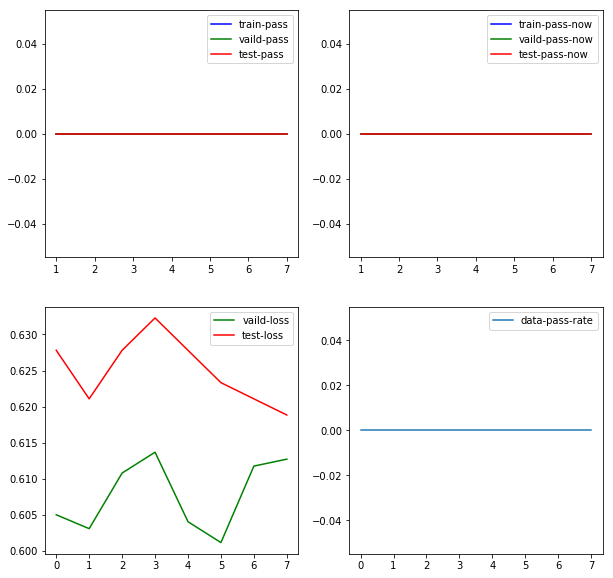

In [80]:
# Yeast-VaildSplit-100-ACC-TrainVaild-FreqScore-smartearlystop-20fold-lr.png
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

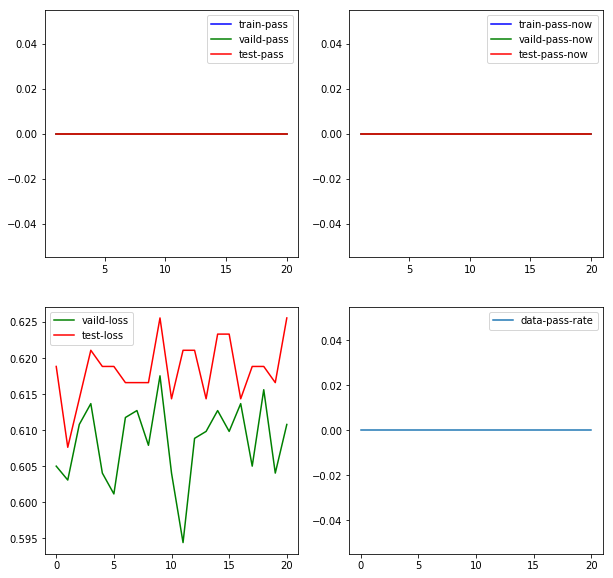

In [78]:
# Yeast-VaildSplit-100-ACC-TrainVaild-FreqScore-smartearlystop-20fold.png
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

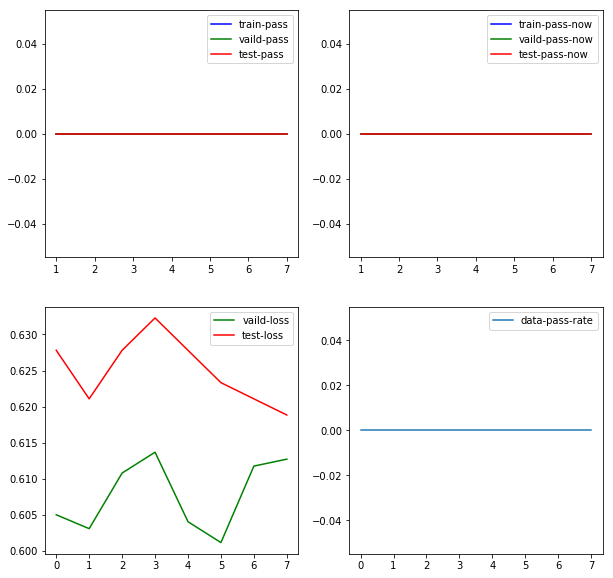

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

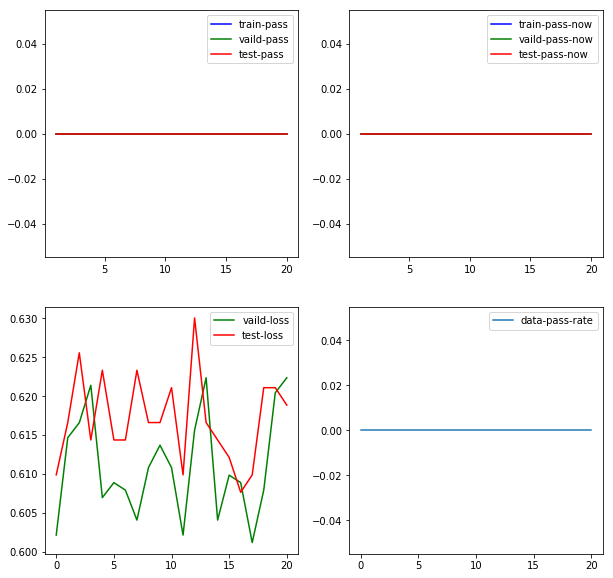

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

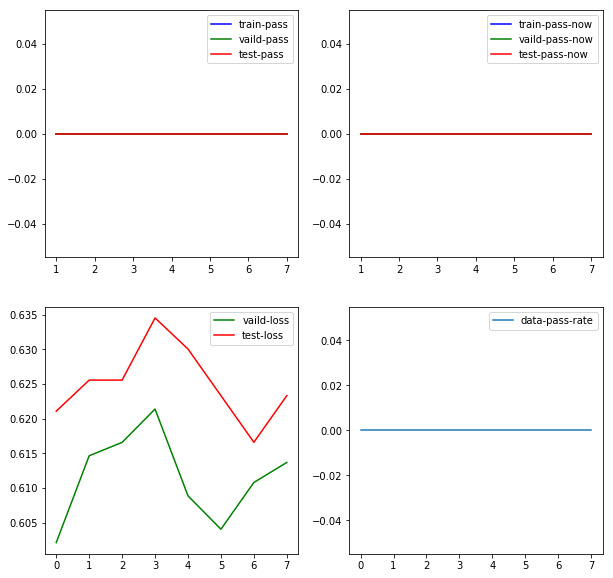

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

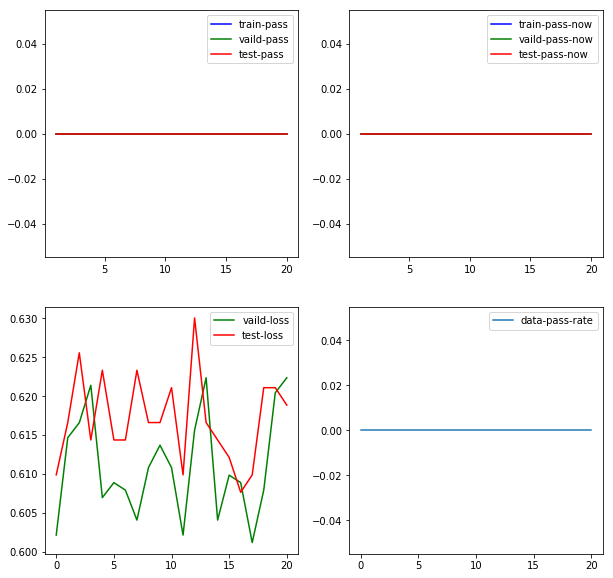

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

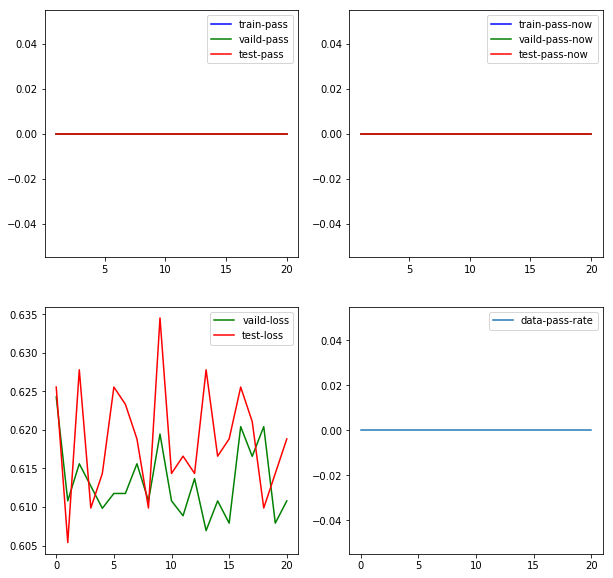

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [148]:
np.max(np.array(test_loss_lt))

0.63452914798206284

In [113]:
list(enumerate(test_loss_lt) )

[(0, 0.62556053811659196),
 (1, 0.60538116591928248),
 (2, 0.62780269058295968),
 (3, 0.60986547085201792),
 (4, 0.61434977578475336),
 (5, 0.62556053811659196),
 (6, 0.62331838565022424),
 (7, 0.6188340807174888),
 (8, 0.60986547085201792),
 (9, 0.63452914798206284),
 (10, 0.61434977578475336),
 (11, 0.61659192825112108),
 (12, 0.61434977578475336),
 (13, 0.62780269058295968),
 (14, 0.61659192825112108),
 (15, 0.6188340807174888),
 (16, 0.62556053811659196),
 (17, 0.62107623318385652),
 (18, 0.60986547085201792),
 (19, 0.61434977578475336),
 (20, 0.6188340807174888)]

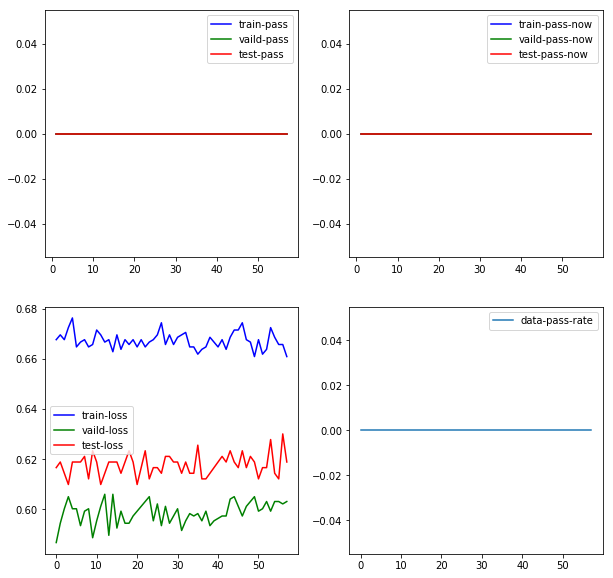

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,train_loss_lt, label="train-loss", color="blue")
plt.plot(x,vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

# Todo list
- 树结构设计（完成）
- 通过gini对数据分割（完成）
- 全局测试集
- 输出结果集
- 打印信息增加pass data的比例
- 防止过拟合
- 对pass data的进一步处理
- 先进行数据均衡化是不是更快一些